#### [학습에 필요한 모듈 선언]

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
# sklearn import error 발생시  pip install sklearn 로 설치
from sklearn.utils import shuffle
from sklearn.preprocessing import minmax_scale, MinMaxScaler, StandardScaler

#### [환경설정]

In [4]:
# 학습 데이터(훈련/검증/테스트) 비율
trainDataRate = 0.7
validationDataRate = 0.1
# 학습률
learningRate = 0.01
# 총 학습 횟수
totalStep = 10001
# 데이터 섞기
shuffleOn = True
# 학습 데이터 경로 지정
datasetFilePath = "./dataset/bank-additional-full.csv"
# 사용할 학습데이터 컬럼 지정
age_yn = True
job_yn = True
marital_yn = True
education_yn = True
default_yn = True
housing_yn = True
loan_yn = True
contact_yn = True
month_yn = True
day_of_week_yn = True
duration_yn = True
campaign_yn = True
pdays_yn = True
previous_yn = True
poutcome_yn = True
emp_var_rate_yn = True
cons_price_idx_yn = True
cons_conf_idx_yn = True
euribor3m_yn = True
nr_employed_yn = True
# Feature Scaling (1:사용안함, 2:Min-Max Normalization, 3:Standardization)
featureScaling = 2


#### [빌드단계] Step1) 학습 데이터 준비(데이터 전처리)

In [5]:
### (1) 데이터 읽어오기
# pandas를 이용하여 CSV 파일 데이터 읽기
if shuffleOn :
    df = shuffle(pd.read_csv(datasetFilePath))
else :
    df = pd.read_csv(datasetFilePath)

# 학습 데이터 확인
print("===== Data =====>")
print(df.head())
print(df.tail())
# 학습데이터 shape 확인
print("df Shape : {}".format(df.shape))

===== Data =====>
       age            job   marital            education  default housing  \
39270   53     technician   married  professional.course       no     yes   
16669   32       services  divorced             basic.9y  unknown      no   
35122   33    blue-collar   married             basic.9y  unknown     yes   
1692    39    blue-collar  divorced             basic.9y       no     yes   
32554   53  self-employed  divorced             basic.4y       no      no   

      loan    contact month day_of_week ...  campaign  pdays  previous  \
39270   no  telephone   mar         mon ...         5    999         2   
16669   no   cellular   jul         wed ...         2    999         0   
35122   no   cellular   may         fri ...         4    999         0   
1692    no  telephone   may         fri ...         3    999         0   
32554   no   cellular   may         mon ...         2    999         0   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m 

In [6]:
### (2) 범주형 데이터 맴핑 선언
job_mapping = {
    "admin." : 1 ,
    "blue-collar" : 2,
    "entrepreneur" : 3,
    "housemaid" : 4,
    "management" : 5,
    "retired" : 6,
    "self-employed" : 7,
    "services" : 8,
    "student" : 9,
    "technician" : 10,
    "unemployed" : 11,
    "unknown" : np.nan
}
marital_mapping = {
    "divorced" : 1,
    "married" : 2,
    "single" : 3,
    "unknown" : np.nan
}
education_mapping = {
    "basic.4y": 1,
    "basic.6y": 2,
    "basic.9y": 3,
    "high.school": 4,
    "illiterate": 5,
    "professional.course": 6,
    "university.degree": 7,
    "unknown": np.nan
}
default_mapping = {
    "no" : 0,
    "yes" : 1,
    "unknown" : np.nan
}
housing_mapping = {
    "no" : 0,
    "yes" : 1,
    "unknown" : np.nan
}
loan_mapping = {
    "no" : 0,
    "yes" : 1,
    "unknown" : np.nan
}
contact_mapping = {
    "cellular" : 1,
    "telephone" : 2
}
month_mapping = {
    "jan" : 1,
    "feb" : 2,
    "mar" : 3,
    "apr" : 4,
    "may" : 5,
    "jun" : 6,
    "jul" : 7,
    "aug" : 8,
    "sep" : 9,
    "oct" : 10,
    "nov" : 11,
    "dec" : 12
}
day_of_week_mapping = {
    "mon" : 1,
    "tue" : 2,
    "wed" : 3,
    "thu" : 4,
    "fri" : 5
}
poutcome_mapping = {
    "failure" : 0,
    "success" : 1,
    "nonexistent" : 2
}
y_mapping = {
    "no" : 0,
    "yes" : 1
}


# 컬럼 별로 맵핑
df['job'] = df['job'].map(job_mapping)
df['marital'] = df['marital'].map(marital_mapping)
df['education'] = df['education'].map(education_mapping)
df['default'] = df['default'].map(default_mapping)
df['housing'] = df['housing'].map(housing_mapping)
df['loan'] = df['loan'].map(loan_mapping)
df['contact'] = df['contact'].map(contact_mapping)
df['month'] = df['month'].map(month_mapping)
df['day_of_week'] = df['day_of_week'].map(day_of_week_mapping)
df['poutcome'] = df['poutcome'].map(poutcome_mapping)
df['y'] = df['y'].map(y_mapping)

# 맵핑 상태 확인
print("===== after mapping =====>")
print(df.head())
print(df.tail())


===== after mapping =====>
       age   job  marital  education  default  housing  loan  contact  month  \
39270   53  10.0      2.0        6.0      0.0      1.0   0.0        2      3   
16669   32   8.0      1.0        3.0      NaN      0.0   0.0        1      7   
35122   33   2.0      2.0        3.0      NaN      1.0   0.0        1      5   
1692    39   2.0      1.0        3.0      0.0      1.0   0.0        2      5   
32554   53   7.0      1.0        1.0      0.0      0.0   0.0        1      5   

       day_of_week ...  campaign  pdays  previous  poutcome  emp.var.rate  \
39270            1 ...         5    999         2         0          -1.8   
16669            3 ...         2    999         0         2           1.4   
35122            5 ...         4    999         0         2          -1.8   
1692             5 ...         3    999         0         2           1.1   
32554            1 ...         2    999         0         2          -1.8   

       cons.price.idx  cons.c

In [7]:
### (3) 결측값 제거
# NaN(np.nan)가 포함된 데이터 행을 삭제
df_withoutNaN = df.dropna(axis=0)

# 결측값 제거 결과 확인
print("===== before remove missing value =====>")
print("shape : {}".format(df.shape))
print("===== after remove missing value =====>")
print("shape : {}".format(df_withoutNaN.shape))

===== before remove missing value =====>
shape : (41188, 21)
===== after remove missing value =====>
shape : (30488, 21)


In [8]:
### (4) 학습을 위한 데이터를 추출
selected_column = list()

if age_yn : selected_column.append("age")
if job_yn : selected_column.append("job")
if marital_yn : selected_column.append("marital")
if education_yn : selected_column.append("education")
if default_yn : selected_column.append("default")
if housing_yn : selected_column.append("housing")
if loan_yn : selected_column.append("loan")
if contact_yn : selected_column.append("contact")
if month_yn : selected_column.append("month")
if day_of_week_yn : selected_column.append("day_of_week")
if duration_yn : selected_column.append("duration")
if campaign_yn : selected_column.append("campaign")
if pdays_yn : selected_column.append("pdays")
if previous_yn : selected_column.append("previous")
if poutcome_yn : selected_column.append("poutcome")
if emp_var_rate_yn : selected_column.append("emp.var.rate")
if cons_price_idx_yn : selected_column.append("cons.price.idx")
if cons_conf_idx_yn : selected_column.append("cons.conf.idx")
if euribor3m_yn : selected_column.append("euribor3m")
if nr_employed_yn : selected_column.append("nr.employed")

df_extraction_feature = df_withoutNaN[selected_column]
df_extraction_result = df_withoutNaN[['y']]

In [9]:
### (5) Feature Scaling
# 결과데이터 리스트로 변환
result_dataList = df_extraction_result.as_matrix()

# Scaling을 한 학습데이터 리스트로 변환
feature_dataList = list()

if featureScaling == 1 :
    # feature scale 사용 안함
    feature_dataList = df_extraction_feature.as_matrix()
elif featureScaling == 2 :
    # Min-Max Normalization 사용
    df_extraction_feature.apply(minmax_scale)
    minmax_scale = MinMaxScaler(feature_range=[0,1]).fit(df_extraction_feature)
    feature_dataList = minmax_scale.transform(df_extraction_feature)
elif featureScaling == 3 :
    # Standardization 사용
    df_extraction_feature.apply(lambda x: StandardScaler(x))
    std_scale = StandardScaler().fit(df_extraction_feature)
    feature_dataList = std_scale.transform(df_extraction_feature)

C:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarn

In [10]:
### (6) 훈련, 검증, 테스트 데이터 나누기
# trainDataRate, validationDataRate 비율로 데이터 나눔
trainDataNumber = round(len(feature_dataList) * trainDataRate)
validationDataNumber = round(len(feature_dataList) * validationDataRate)
# 훈련 데이터 선언
xTrainDataList = feature_dataList[:trainDataNumber]
yTrainDataList = result_dataList[:trainDataNumber]
# 검증 데이터 선언
xValidationDataList = feature_dataList[trainDataNumber:trainDataNumber+validationDataNumber]
yValidationDataList = result_dataList[trainDataNumber:trainDataNumber+validationDataNumber]
# 테스트 데이터 선언
xTestDataList = feature_dataList[trainDataNumber+validationDataNumber:]
yTestDataList = result_dataList[trainDataNumber+validationDataNumber:]


print("[TrainData Size]\nx : {}, y : {}".format(len(xTrainDataList),len(yTrainDataList)))
print("[ValidationData Size]\nx : {}, y : {}".format(len(xValidationDataList),len(yValidationDataList)))
print("[TestData Size]\nx : {}, y : {}".format(len(xTestDataList),len(yTestDataList)))

[TrainData Size]
x : 21342, y : 21342
[ValidationData Size]
x : 3049, y : 3049
[TestData Size]
x : 6097, y : 6097


#### [빌드단계] Step 2) 모델 생성을 위한 변수 초기화

In [11]:
# feature 로 사용할 데이터 갯수
feature_num = len(selected_column)

# 학습데이터(x : feature)가 들어갈 플레이스 홀더 선언
X = tf.placeholder(tf.float32, shape=[None, feature_num])
# 학습데이터(y : result)가 들어갈 플레이스 홀더 선언
Y = tf.placeholder(tf.float32, shape=[None, 1])

# Weight 변수 선언
W = tf.Variable(tf.random_uniform([feature_num, 1]), name='weight')
# Bias 변수 선언
b = tf.Variable(tf.random_uniform([1]), name='bias')


#### [빌드단계] 3) 학습 모델 그래프 구성

In [12]:
# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W)))
# 3-1) 학습데이터를 대표 하는 가설 그래프 선언
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# 3-2) 비용함수(오차함수,손실함수) 선언
costFunction = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))

# 3-3) 비용함수의 값이 최소가 되도록 하는 최적화함수 선언
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learningRate)
train = optimizer.minimize(costFunction)

#### [실행단계] 학습 모델 그래프를 실행

--------------------------------------------------------------------------------
Train(Optimization) Start 
step : 0. cost : 4.652719497680664, accuracy : 0.12637053430080414
step : 1000. cost : 0.33997732400894165, accuracy : 0.8737700581550598
step : 2000. cost : 0.3316195607185364, accuracy : 0.8737231492996216
step : 3000. cost : 0.3257049024105072, accuracy : 0.8743791580200195
step : 4000. cost : 0.3213188052177429, accuracy : 0.8760191202163696
step : 5000. cost : 0.3179372549057007, accuracy : 0.8771905303001404
step : 6000. cost : 0.3152450621128082, accuracy : 0.8797675967216492
step : 7000. cost : 0.31304416060447693, accuracy : 0.882344663143158
step : 8000. cost : 0.31120356917381287, accuracy : 0.8842189311981201
step : 9000. cost : 0.30963432788848877, accuracy : 0.8852965831756592
step : 10000. cost : 0.30827367305755615, accuracy : 0.8860931396484375
W : [[-8.0917531e-04]
 [ 6.5802403e-02]
 [ 1.5403922e-01]
 [ 1.3817133e-01]
 [ 2.8907865e-01]
 [-1.8123524e-03]
 [ 6.286

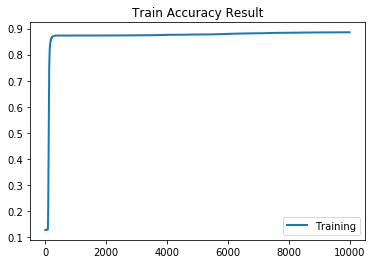

Train Finished
--------------------------------------------------------------------------------
Validation Start
step : 0. cost : 0.29479366540908813, accuracy : 0.8907838463783264
step : 1000. cost : 0.29259300231933594, accuracy : 0.8917677998542786
step : 2000. cost : 0.29087725281715393, accuracy : 0.8914397954940796
step : 3000. cost : 0.28946131467819214, accuracy : 0.8911118507385254
step : 4000. cost : 0.2882499098777771, accuracy : 0.8907838463783264
step : 5000. cost : 0.2871861159801483, accuracy : 0.8901278972625732
step : 6000. cost : 0.2862338721752167, accuracy : 0.8911118507385254
step : 7000. cost : 0.28536930680274963, accuracy : 0.8907838463783264
step : 8000. cost : 0.2845754325389862, accuracy : 0.8907838463783264
step : 9000. cost : 0.2838399112224579, accuracy : 0.8907838463783264
step : 10000. cost : 0.2831535339355469, accuracy : 0.8914397954940796
W : [[ 0.0872904 ]
 [ 0.19281496]
 [ 0.10447097]
 [ 0.2546513 ]
 [ 0.28907865]
 [ 0.1003106 ]
 [ 0.13692378]
 [-0.

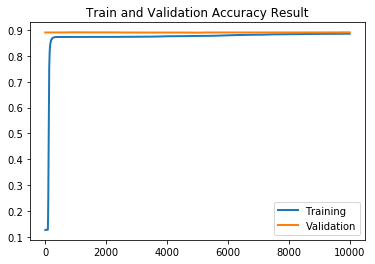

Validation Finished
--------------------------------------------------------------------------------
[Test Result]

Hypothesis : [[0.30763832]
 [0.16611402]
 [0.03014455]
 ...
 [0.0302178 ]
 [0.05295741]
 [0.0241276 ]] 
Prediction : [[False]
 [ True]
 [ True]
 ...
 [ True]
 [ True]
 [ True]] 
Accuracy : 0.887649655342102
--------------------------------------------------------------------------------


In [13]:
# 실행을 위한 세션 선언
sess = tf.Session()
# 최적화 과정을 통하여 구해질 변수 W,b 초기화
sess.run(tf.global_variables_initializer())


# 예측값, 정확도 수식 선언
predicted = tf.equal(tf.sign(hypothesis-0.5), tf.sign(Y-0.5))
accuracy = tf.reduce_mean(tf.cast(predicted, tf.float32))


# 학습, 검증 정확도를 저장할 리스트 선언
train_accuracy = list()
validation_accuracy = list()


print("--------------------------------------------------------------------------------")
print("Train(Optimization) Start ")

for step in range(totalStep):
    # X, Y에 학습데이터 입력하여 비용함수, W, b, accuracy, train을 실행
    cost_val, W_val, b_val, acc_val, _ = sess.run([costFunction, W, b, accuracy, train],
                                        feed_dict = {X: xTrainDataList, Y: yTrainDataList})
    train_accuracy.append(acc_val)

    if step % 1000 == 0:
        print("step : {}. cost : {}, accuracy : {}"
              .format(step, cost_val, acc_val))
    if step == totalStep-1 :
        print("W : {}\nb:{}".format(W_val, b_val))

# matplotlib 를 이용하여 결과를 시각화
# 정확도 결과 확인 그래프
plt.plot(range(len(train_accuracy)), train_accuracy, linewidth = 2, label = 'Training')
plt.legend()
plt.title("Train Accuracy Result")
plt.show()

print("Train Finished")
print("--------------------------------------------------------------------------------")
print("Validation Start")
for step in range(totalStep):
    # X, Y에 테스트데이터 입력하여 비용함수, W, b, accuracy, train을 실행
    cost_val_v, W_val_v, b_val_v, acc_val_v, _ = sess.run([costFunction, W, b, accuracy, train],
                                                feed_dict = {X: xValidationDataList, Y: yValidationDataList})
    validation_accuracy.append(acc_val_v)

    if step % 1000 == 0:
        print("step : {}. cost : {}, accuracy : {}"
              .format(step, cost_val_v, acc_val_v))

    if step == totalStep-1:
        print("W : {}\nb:{}".format(W_val_v, b_val_v))

# matplotlib 를 이용하여 결과를 시각화
# 정확도 결과 확인 그래프
plt.plot(range(len(train_accuracy)), train_accuracy, linewidth = 2, label = 'Training')
plt.plot(range(len(validation_accuracy)), validation_accuracy, linewidth = 2, label = 'Validation')
plt.legend()
plt.title("Train and Validation Accuracy Result")
plt.show()

print("Validation Finished")
print("--------------------------------------------------------------------------------")
print("[Test Result]")
# 최적화가 끝난 학습 모델 테스트
h_val, p_val, a_val = sess.run([hypothesis, predicted, accuracy],
                    feed_dict={X: xTestDataList, Y: yTestDataList})
print("\nHypothesis : {} \nPrediction : {} \nAccuracy : {}".format(h_val,p_val,a_val))
print("--------------------------------------------------------------------------------")

#세션종료
sess.close()